In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Getting the number of unique IP addresses per country appearing in the dataset df and adding the `country` column...
def duplicate_filter(df):
    for rows in range(len(df)):
        new_val = df.iloc[rows]['geo']
        if new_val:
            df.at[rows,'country'] = new_val['c']
        else:
            df.at[rows,'country'] = ''
    df_unique = df.drop_duplicates(subset='ip')
    per_country_counts = df_unique.country.value_counts()
    return (df_unique, per_country_counts)

In [3]:
# cleaning the banner of unwanted charecters...
def clean_banner(df):
    for rows in range(len(df)):
        df.at[rows,'banner'] = re.sub('(\\\\x(([a-z][a-z])|([0-9][0-9])|([0-9][a-z])|([a-z][0-9])))|\\r\\n', '', df.iloc[rows]['banner']).lstrip()
        
    return df

In [4]:
# Counting routers...
def count_routers(df):
    count_router = 0
    count_server = 0
    router = "router"
    for rows in range(len(df)):
        if router in df.iloc[rows]["banner"].lower():
            count_router+=1
        else:
            count_server+=1
    return (count_router, count_server)

In [8]:
#Searching banners for specific implementations given in the `keyword` list and counting their nos. for each country...
def country_banner_filter(df):
    keywords = ['cisco','d-link','freebsd','jetdirect','netgear','solaris']
    keywords_chn = {'cisco':0,'d-link':0,'freebsd':0,'jetdirect':0,'netgear':0,'solaris':0}
    keywords_usa = {'cisco':0,'d-link':0,'freebsd':0,'jetdirect':0,'netgear':0,'solaris':0}
    keywords_kor = {'cisco':0,'d-link':0,'freebsd':0,'jetdirect':0,'netgear':0,'solaris':0}
    potential_ips = {'CHN':[], 'USA':[], 'KOR':[]}
    df = df[df.country.isin(list(potential_ips.keys()))]
    comp_flag = 0
    for rows in range(len(df)):
        country = df.iloc[rows]['country']
        if country in potential_ips.keys():
            banner_info = df.iloc[rows]['banner'].lower()
            for i in range(len(keywords)):
                keyword = keywords[i]
                if keyword in banner_info:
#                     potential_ips[country].append(df.iloc[rows]['ip'])
                    #sources[country].add(keyword)
                    if country == 'CHN':
                        keywords_chn[keyword]+=1
                    elif country == 'USA':
                        keywords_usa[keyword]+=1
                    elif country == 'KOR':
                        keywords_kor[keyword]+=1
                    i = len(keywords)
                               
    return (keywords_chn, keywords_usa, keywords_kor)

In [9]:
def extract_banner_wise_data(filename):
    print("Extracting banner data for", filename)
    df = pd.read_json(filename, lines=True)
    print('Filtering countries and duplicates...')
    (df, country_stats) = duplicate_filter(df)
    print('Scanning banners...')
    (keywords_chn, keywords_usa, keywords_kor) = country_banner_filter(df)
    return (df, country_stats, keywords_chn, keywords_usa, keywords_kor)

In [10]:
# Feb 2013
(df_feb_13, country_stats_feb_13, keywords_chn_feb_13, keywords_usa_feb_13, keywords_kor_feb_13) = extract_banner_wise_data('../Data files/critical_201302_23.json')

# Jan 2013
(df_jan_13, country_stats_jan_13, keywords_chn_jan_13, keywords_usa_jan_13, keywords_kor_jan_13) = extract_banner_wise_data('../Data files/critical_201301_23.json')

#Mar 2013
(df_mar_13, country_stats_mar_13, keywords_chn_mar_13, keywords_usa_mar_13, keywords_kor_mar_13) = extract_banner_wise_data('../Data files/critical_201303_23.json')

Extracting banner data for ../Data files/critical_201302_23.json
Filtering countries and duplicates...
Scanning banners...
Extracting banner data for ../Data files/critical_201301_23.json
Filtering countries and duplicates...
Scanning banners...
Extracting banner data for ../Data files/critical_201303_23.json
Filtering countries and duplicates...
Scanning banners...


In [11]:
# #May 2012
# (df_may_12, country_stats_may_12, potential_ips_may_12, keywords_chn_may_12, keywords_usa_may_12, keywords_kor_may_12) = extract_banner_wise_data('../Data files/critical_201205_23.json')

# #Jun 2012
# (df_jun_12, country_stats_jun_12, potential_ips_jun_12, keywords_chn_jun_12, keywords_usa_jun_12, keywords_kor_jun_12) = extract_banner_wise_data('../Data files/critical_201206_23.json')

# #Jul 2012
# (df_jul_12, country_stats_jul_12, potential_ips_jul_12, keywords_chn_jul_12, keywords_usa_jul_12, keywords_kor_jul_12) = extract_banner_wise_data('../Data files/critical_201207_23.json')

#Aug 2012
(df_aug_12, country_stats_aug_12, keywords_chn_aug_12, keywords_usa_aug_12, keywords_kor_aug_12) = extract_banner_wise_data('../Data files/critical_201208_23.json')

#Sep 2012
(df_sep_12, country_stats_sep_12, keywords_chn_sep_12, keywords_usa_sep_12, keywords_kor_sep_12) = extract_banner_wise_data('../Data files/critical_201209_23.json')

#Oct 2012
(df_oct_12, country_stats_oct_12, keywords_chn_oct_12, keywords_usa_oct_12, keywords_kor_oct_12) = extract_banner_wise_data('../Data files/critical_201210_23.json')

#Nov 2012
(df_nov_12, country_stats_nov_12, keywords_chn_nov_12, keywords_usa_nov_12, keywords_kor_nov_12) = extract_banner_wise_data('../Data files/critical_201211_23.json')

#Dec 2012
(df_dec_12, country_stats_dec_12, keywords_chn_dec_12, keywords_usa_dec_12, keywords_kor_dec_12) = extract_banner_wise_data('../Data files/critical_201212_23.json')


Extracting banner data for ../Data files/critical_201208_23.json
Filtering countries and duplicates...
Scanning banners...
Extracting banner data for ../Data files/critical_201209_23.json
Filtering countries and duplicates...
Scanning banners...
Extracting banner data for ../Data files/critical_201210_23.json
Filtering countries and duplicates...
Scanning banners...
Extracting banner data for ../Data files/critical_201211_23.json
Filtering countries and duplicates...
Scanning banners...
Extracting banner data for ../Data files/critical_201212_23.json
Filtering countries and duplicates...
Scanning banners...


In [37]:
# #May 2012
(df_may_12, country_stats_may_12, keywords_chn_may_12, keywords_usa_may_12, keywords_kor_may_12) = extract_banner_wise_data('../Data files/critical_201205_23.json')

# #Jun 2012
(df_jun_12, country_stats_jun_12, keywords_chn_jun_12, keywords_usa_jun_12, keywords_kor_jun_12) = extract_banner_wise_data('../Data files/critical_201206_23.json')

# #Jul 2012
(df_jul_12, country_stats_jul_12, keywords_chn_jul_12, keywords_usa_jul_12, keywords_kor_jul_12) = extract_banner_wise_data('../Data files/critical_201207_23.json')



Extracting banner data for ../Data files/critical_201205_23.json
Filtering countries and duplicates...
Scanning banners...
Extracting banner data for ../Data files/critical_201206_23.json
Filtering countries and duplicates...
Scanning banners...
Extracting banner data for ../Data files/critical_201207_23.json
Filtering countries and duplicates...
Scanning banners...


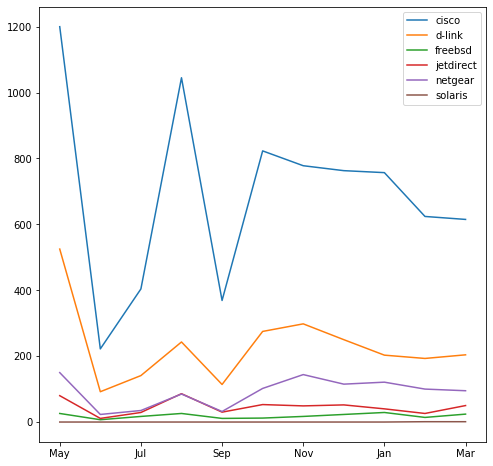

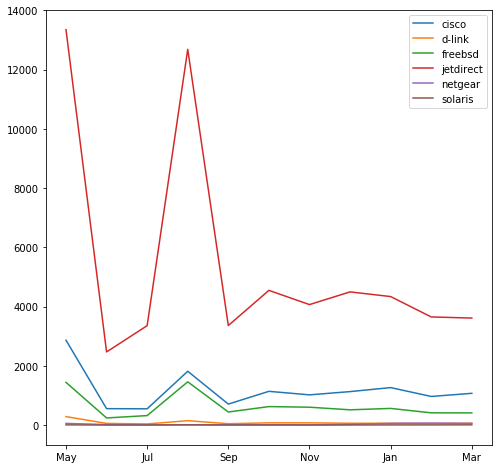

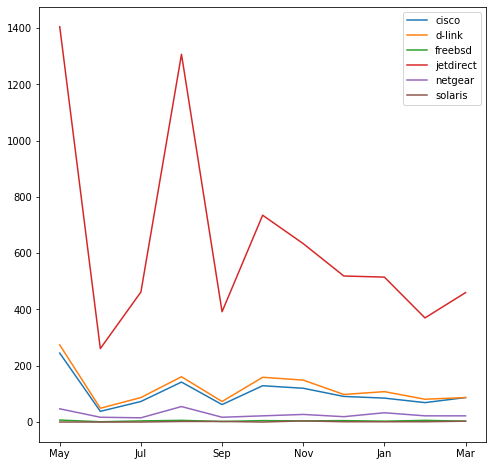

In [39]:
df_plot_chn = pd.DataFrame({'May':keywords_chn_may_12 , 'Jun': keywords_chn_jun_12, 'Jul': keywords_chn_jul_12, 'Aug': keywords_chn_aug_12, 'Sep':keywords_chn_sep_12, 'Oct': keywords_chn_oct_12, 'Nov':keywords_chn_nov_12, 'Dec':keywords_chn_dec_12, 'Jan':keywords_chn_jan_13, 'Feb': keywords_chn_feb_13, 'Mar':keywords_chn_mar_13})
df_plot_usa = pd.DataFrame({'May':keywords_usa_may_12 , 'Jun': keywords_usa_jun_12, 'Jul': keywords_usa_jul_12, 'Aug': keywords_usa_aug_12, 'Sep':keywords_usa_sep_12, 'Oct': keywords_usa_oct_12, 'Nov':keywords_usa_nov_12, 'Dec':keywords_usa_dec_12, 'Jan':keywords_usa_jan_13, 'Feb': keywords_usa_feb_13, 'Mar':keywords_usa_mar_13})
df_plot_kor = pd.DataFrame({'May':keywords_kor_may_12 , 'Jun': keywords_kor_jun_12, 'Jul': keywords_kor_jul_12, 'Aug': keywords_kor_aug_12, 'Sep':keywords_kor_sep_12, 'Oct': keywords_kor_oct_12, 'Nov':keywords_kor_nov_12, 'Dec':keywords_kor_dec_12, 'Jan':keywords_kor_jan_13, 'Feb': keywords_kor_feb_13, 'Mar':keywords_kor_mar_13})
df_plot_chn.T.plot(label='CHN', figsize=(8,8))
df_plot_usa.T.plot(label='USA', figsize=(8,8))
df_plot_kor.T.plot(label='KOR', figsize=(8,8))

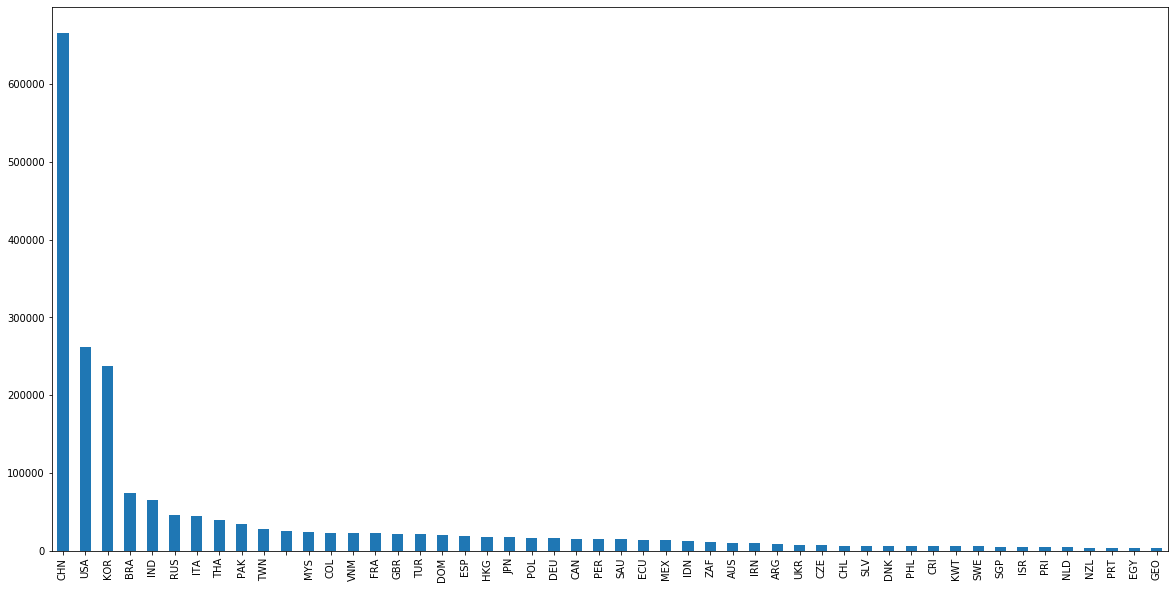

In [100]:
country_stats_mar_13[:50].plot.bar(figsize=(20,10))

Mar 2013: 
CHN: 997,
USA: 5285,
KOR: 663

Feb 2013: 
CHN: 972,
USA: 5226,
KOR: 552

Jan 2013: 
CHN: 1171,
USA: 6385,
KOR: 747



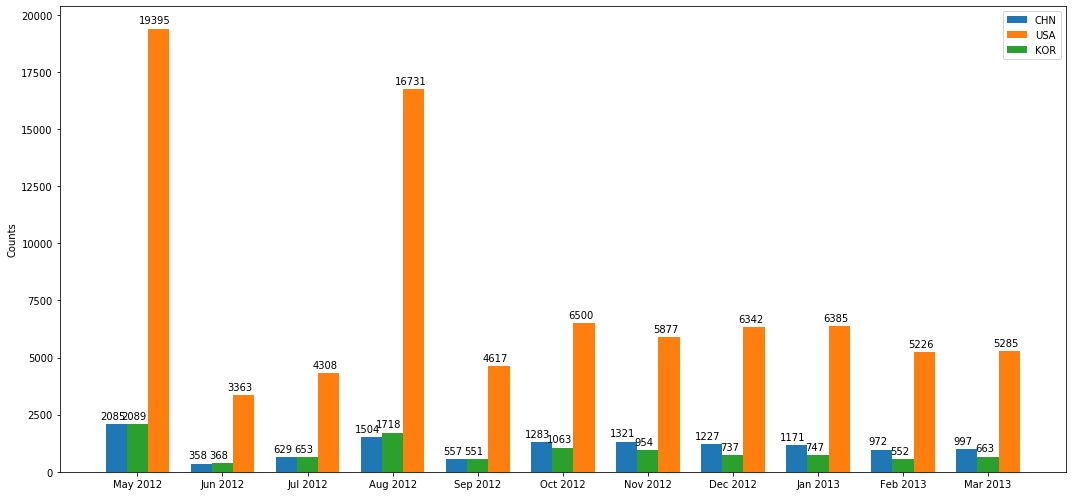

<Figure size 3600x3600 with 0 Axes>

In [103]:
print('Mar 2013: \nCHN: %d,\nUSA: %d,\nKOR: %d\n' 
      % (len(potential_ips_mar_13['CHN']), len(potential_ips_mar_13['USA']), len(potential_ips_mar_13['KOR'])))
print('Feb 2013: \nCHN: %d,\nUSA: %d,\nKOR: %d\n' 
      % (len(potential_ips_feb_13['CHN']), len(potential_ips_feb_13['USA']), len(potential_ips_feb_13['KOR'])))
print('Jan 2013: \nCHN: %d,\nUSA: %d,\nKOR: %d\n' 
      % (len(potential_ips_jan_13['CHN']), len(potential_ips_jan_13['USA']), len(potential_ips_jan_13['KOR'])))

labels = ['May 2012','Jun 2012','Jul 2012','Aug 2012','Sep 2012','Oct 2012',
          'Nov 2012','Dec 2012','Jan 2013', 'Feb 2013', 'Mar 2013']
chn_counts = [len(potential_ips_may_12['CHN']), len(potential_ips_jun_12['CHN']), len(potential_ips_jul_12['CHN']),
              len(potential_ips_aug_12['CHN']), len(potential_ips_sep_12['CHN']), len(potential_ips_oct_12['CHN']),
              len(potential_ips_nov_12['CHN']), len(potential_ips_dec_12['CHN']), len(potential_ips_jan_13['CHN']), 
              len(potential_ips_feb_13['CHN']), len(potential_ips_mar_13['CHN'])]

usa_counts = [len(potential_ips_may_12['USA']), len(potential_ips_jun_12['USA']), len(potential_ips_jul_12['USA']),
              len(potential_ips_aug_12['USA']), len(potential_ips_sep_12['USA']), len(potential_ips_oct_12['USA']),
              len(potential_ips_nov_12['USA']), len(potential_ips_dec_12['USA']), len(potential_ips_jan_13['USA']), 
              len(potential_ips_feb_13['USA']), len(potential_ips_mar_13['USA'])]

kor_counts = [len(potential_ips_may_12['KOR']), len(potential_ips_jun_12['KOR']), len(potential_ips_jul_12['KOR']),
              len(potential_ips_aug_12['KOR']), len(potential_ips_sep_12['KOR']), len(potential_ips_oct_12['KOR']),
              len(potential_ips_nov_12['KOR']), len(potential_ips_dec_12['KOR']), len(potential_ips_jan_13['KOR']), 
              len(potential_ips_feb_13['KOR']), len(potential_ips_mar_13['KOR'])]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width, chn_counts, width, label='CHN')
rects2 = ax.bar(x + width, usa_counts, width, label='USA')
rects3 = ax.bar(x, kor_counts, width, label = 'KOR')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
# ax.set_title('Counts by country from Jan to Mar 2013')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 3, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.figure(figsize=(50,50))

plt.show()